In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import itertools
import os
from datetime import datetime
from scipy import stats

# Disables all deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [85]:
def data_preparation(df):
    # Pré-processando as variáveis
    df_prep = df.copy()
    df_prep['Compartments'] = df_prep['Compartments'].astype(int).astype(object)

    cat_columns = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
    for column in cat_columns:
        # Mostrando a distribuição antes do preenchimento
        category_percent = df_prep[column].value_counts(normalize=True)
        
        # Preenchendo valores NaN com base nas proporções existentes entre as categorias
        n_nan = df_prep[column].isna().sum()
        categories = category_percent.index
        proportions = category_percent.values

        new_values = np.random.choice(categories, size=n_nan, p=proportions)

        df_prep.loc[df_prep[column].isna(), column] = new_values

    df_prep['Weight Capacity (kg)'] = df_prep['Weight Capacity (kg)'].fillna(df_prep['Weight Capacity (kg)'].mean())

    # Engenharia de atributos: get dummies para TODAS variáveis categóricas
    df_eng = df_prep.copy()
    cat_columns = df_eng.select_dtypes(include=['object']).columns
    for column in cat_columns:
        df_eng = pd.get_dummies(df_eng, columns=[column], prefix=['dum'], dtype=int)

    scaler = MinMaxScaler()
    df_eng['Weight Capacity (kg)'] = scaler.fit_transform(df_eng[['Weight Capacity (kg)']])

    return df_eng

def model_training(df_eng):
    # Dividindo as variáveis independentes (X) e o target (y)
    X = df_eng.drop('Price', axis=1)
    y = df_eng['Price']

    ridge = Ridge(alpha=100)
    ridge.fit(X, y)

    return ridge

def csv_create(y_pred, ids):
      
    # Creating the submission DataFrame with 'id' and 'Transported'
    submission_data = pd.DataFrame({
        'id': ids,
        'Price': y_pred
    })
    
    # Checking for the 'submission' folder
    current_directory = os.getcwd()
    all_items = os.listdir(current_directory)
    folders = [item for item in all_items if os.path.isdir(os.path.join(current_directory, item))]
    
    # Checking if the 'submissions' folder exists, if not, create it
    if 'submissions' not in folders:
        submission_folder = os.path.join(current_directory, 'submissions')
        os.makedirs(submission_folder)
        
    # Getting the current date and time to create a unique filename
    now = datetime.now()
    filename = now.strftime("submission_%d_%m_%y_%H_%M.csv")
    
    # Saving the CSV in the 'submissions' folder with the date and time in the filename
    submission_data.to_csv(f'submissions/{filename}', index=False)
    
    print(f"File '{filename}' has been created in the 'submissions' folder!")

In [3]:
# Carregando os datasets para o treinamento e concantenando-os
df_1 = pd.read_csv("../data/train.csv")
df_2 = pd.read_csv("../data/training_extra.csv")
df = pd.concat([df_1, df_2], axis=0)

# Preparando os dados de treino
df_prep = data_preparation(df)
df_prep = df_prep.drop(columns='id')

# Treinando o modelo
model = model_training(df_prep)

# Carregando o data set de teste
df_test = pd.read_csv("../data/test.csv")

# Guardando os 'ids'
ids = df_test['id']

# Preparando os dados de teste
df_test_prep = data_preparation(df_test)
df_to_predict = df_test_prep.drop(columns='id')

# Prevendo os valores de 'Price' no dataset de teste
y_pred = model.predict(df_to_predict)

# Criando o arquivo '.csv' para submissão
csv_create(y_pred, ids)

File 'submission_17_02_25_07_37.csv' has been created in the 'submissions' folder!


In [94]:
def data_preparation_2(df):
    # Pré-processando as variáveis
    df_prep = df.copy()
    df_prep['Compartments'] = df_prep['Compartments'].astype(int).astype(object)

    cat_columns = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
    for column in cat_columns:
        # Mostrando a distribuição antes do preenchimento
        category_percent = df_prep[column].value_counts(normalize=True)
        
        # Preenchendo valores NaN com base nas proporções existentes entre as categorias
        n_nan = df_prep[column].isna().sum()
        categories = category_percent.index
        proportions = category_percent.values

        new_values = np.random.choice(categories, size=n_nan, p=proportions)

        df_prep.loc[df_prep[column].isna(), column] = new_values

    df_prep['Weight Capacity (kg)'] = df_prep['Weight Capacity (kg)'].fillna(df_prep['Weight Capacity (kg)'].mean())

    # Engenharia de Atributos:
    df_eng = df_prep.copy()

    # Engenharia de Atributos: transformando 'Size' em numérica ordinal
    size_mapping = {
        'Small': 1,
        'Medium': 2,
        'Large': 3
    }
    df_eng['Size'] = df_eng['Size'].replace(size_mapping)
    
    # Engenharia de Atributos: convertendo 'Yes' e 'No' em 1 e 0 nas variáveis 'Laptop Compartment' e 'Waterproof'
    df_eng['Laptop Compartment'] = df_eng['Laptop Compartment'].replace({'Yes': 1, 'No': 0})
    df_eng['Waterproof'] = df_eng['Waterproof'].replace({'Yes': 1, 'No': 0})


    # Engenharia de atributos: get dummies para as variáveis categóricas
    cat_columns = df_eng.select_dtypes(include=['object']).columns
    for column in cat_columns:
        df_eng = pd.get_dummies(df_eng, columns=[column], prefix=['dum_' + column], dtype=int)

    # Engenharia de atributos: normalizar os valores da colna 'Weight Capacity (kg)'
    scaler = MinMaxScaler()
    df_eng['Weight Capacity (kg)'] = scaler.fit_transform(df_eng[['Weight Capacity (kg)']])

    return df_eng

In [89]:
# Carregando os datasets para o treinamento e concantenando-os
df_1 = pd.read_csv("../data/train.csv")
df_2 = pd.read_csv("../data/training_extra.csv")
df = pd.concat([df_1, df_2], axis=0)

# Preparando os dados de treino
df_prep = data_preparation_2(df)
df_prep = df_prep.drop(columns='id')

# Treinando o modelo
model = model_training(df_prep)

# Carregando o data set de teste
df_test = pd.read_csv("../data/test.csv")

# Guardando os 'ids'
ids = df_test['id']

# Preparando os dados de teste
df_test_prep = data_preparation_2(df_test)
df_to_predict = df_test_prep.drop(columns='id')

# Prevendo os valores de 'Price' no dataset de teste
y_pred = model.predict(df_to_predict)

# Criando o arquivo '.csv' para submissão
csv_create(y_pred, ids)

File 'submission_17_02_25_09_29.csv' has been created in the 'submissions' folder!


### ESTUDO PARA AS REFLEXÕES A RESPEITO DO DESEMPENHO RUIM DO MEU MODELO

In [95]:
# Carregando os datasets para o treinamento e concantenando-os
df_1 = pd.read_csv("../data/train.csv")
df_2 = pd.read_csv("../data/training_extra.csv")
df = pd.concat([df_1, df_2], axis=0)

# Preparando os dados de treino
df_prep = data_preparation_2(df)
df_prep = df_prep.drop(columns='id')

# Separando em base de treino e de teste
X = df_prep.drop(columns=['Price'])
y = df_prep['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

# Predizendo o target
y_pred = ridge.predict(X_test)

# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{rmse:.5f}")

38.89513


In [96]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

rmse= np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{rmse:.5f}")

38.89513


In [9]:
# Carregando os datasets para o treinamento e concantenando-os
df_1 = pd.read_csv("../data/train.csv")
df_2 = pd.read_csv("../data/training_extra.csv")
df = pd.concat([df_1, df_2], axis=0)

# Preparando os dados de treino
df_prep = data_preparation_2(df)
df_prep = df_prep.drop(columns='id')

# Separando em base de treino e de teste
X = df_prep.drop(columns=['Price'])
y = df_prep['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

# Predizendo o target
y_pred = ridge.predict(X_test)

# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{rmse:.5f}")

38.89452


### NOVOS TESTES

In [58]:
# Carregando os datasets para o treinamento e concantenando-os
df_1 = pd.read_csv("../data/train.csv")

# Preparando os dados
df_prep = df_1.copy()

df_prep['Compartments'] = df_prep['Compartments'].astype(int).astype(object)

cat_columns = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
for column in cat_columns:
    # Mostrando a distribuição antes do preenchimento
    category_percent = df_prep[column].value_counts(normalize=True)
        
    # Preenchendo valores NaN com base nas proporções existentes entre as categorias
    n_nan = df_prep[column].isna().sum()
    categories = category_percent.index
    proportions = category_percent.values
    
    new_values = np.random.choice(categories, size=n_nan, p=proportions)

    df_prep.loc[df_prep[column].isna(), column] = new_values

df_prep['Weight Capacity (kg)'] = df_prep['Weight Capacity (kg)'].fillna(df_prep['Weight Capacity (kg)'].mean())

df_prep = df_prep.drop(columns='id')
# Engenharia de atributos: get dummies para TODAS variáveis categóricas
df_eng = df_prep.copy()
cat_columns = df_eng.select_dtypes(include=['object']).columns
for column in cat_columns:
    df_eng = pd.get_dummies(df_eng, columns=[column], prefix=['dum_' + column], dtype=int)

scaler = MinMaxScaler()
df_eng['Weight Capacity (kg)'] = scaler.fit_transform(df_eng[['Weight Capacity (kg)']])

In [136]:
import pandas as pd
from scipy import stats
variaveis_a_remover = []
# Função para realizar o teste de Mann-Whitney
def realizar_mann_whitney(df, target, variavel_binaria):
    group_0 = df[df[variavel_binaria] == 0][target]  # Extrai dados do grupo 0
    group_1 = df[df[variavel_binaria] == 1][target]  # Extrai dados do grupo 1
    stat, p_value = stats.mannwhitneyu(group_0, group_1, alternative='two-sided')  # Teste de Mann-Whitney
    return p_value

# Função para analisar todas as variáveis binárias com Mann-Whitney
def analisar_variaveis_binarias_com_mann_whitney(df, target):
    for coluna in df.columns:
        if df[coluna].dtype == 'int32' and df[coluna].nunique() == 2:  # Verifica se a coluna é binária (0 ou 1)
            #print(f'\nAnalisando a relação entre {coluna} e {target}...')
            p_value = realizar_mann_whitney(df, target, coluna)
            #print(f'p-value para {coluna} (teste de Mann-Whitney): {p_value}')
            if p_value < 0.05:
                print(f'  - Existe uma diferença significativa nas distribuições de {target} entre as categorias de {coluna}.')
            else:
                variaveis_a_remover.append(coluna)
                #print(f'  - NÃO existe uma diferença significativa nas distribuições de {target} entre as categorias de {coluna}.')

# Exemplo de uso
# Suponha que seu DataFrame seja 'df' e a variável target seja 'Price'
# 'df' contém as 35 variáveis binárias e a variável target 'Price'

# Analisando todas as variáveis binárias com o teste de Mann-Whitney
analisar_variaveis_binarias_com_mann_whitney(df_eng, 'Price')
print(len(df_eng.select_dtypes(include=['int']).columns))
print(len(variaveis_a_remover))

  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Adidas.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Jansport.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Nike.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Puma.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Under Armour.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Canvas.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Leather.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Nylon.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Polyester.
  - Existe uma dif

In [60]:
print(variavias_a_remover)

['dum_Brand_Nike', 'dum_Brand_Puma', 'dum_Size_Large', 'dum_Size_Medium', 'dum_Size_Small', 'dum_Compartments_1', 'dum_Compartments_2', 'dum_Compartments_3', 'dum_Compartments_5', 'dum_Compartments_6', 'dum_Compartments_7', 'dum_Compartments_10', 'dum_Laptop Compartment_No', 'dum_Laptop Compartment_Yes', 'dum_Waterproof_No', 'dum_Waterproof_Yes', 'dum_Style_Backpack', 'dum_Style_Messenger', 'dum_Style_Tote', 'dum_Color_Pink']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Função para gerar boxplots de 'Price' para cada variável binária
def visualizar_relacao_com_target(df, target, variaveis_binarias):
    for coluna in variaveis_binarias:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[coluna], y=df[target])  # Boxplot entre 'Price' e a variável binária
        plt.title(f'Distribuição de {target} para {coluna}')
        plt.xlabel(coluna)
        plt.ylabel(target)
        plt.show()

# Suponha que você tenha uma lista com as variáveis binárias (categóricas após Label Encoding ou One-Hot Encoding)
variaveis_binarias_significativas = df_eng.select_dtypes(include=['int']).columns

# Visualizando a relação entre as variáveis binárias e o 'Price'
visualizar_relacao_com_target(df_eng, 'Price', variaveis_binarias_significativas)


Coeficiente de correlação de Pearson entre "Weight Capacity (kg)" e "Price": 0.01801260642665715


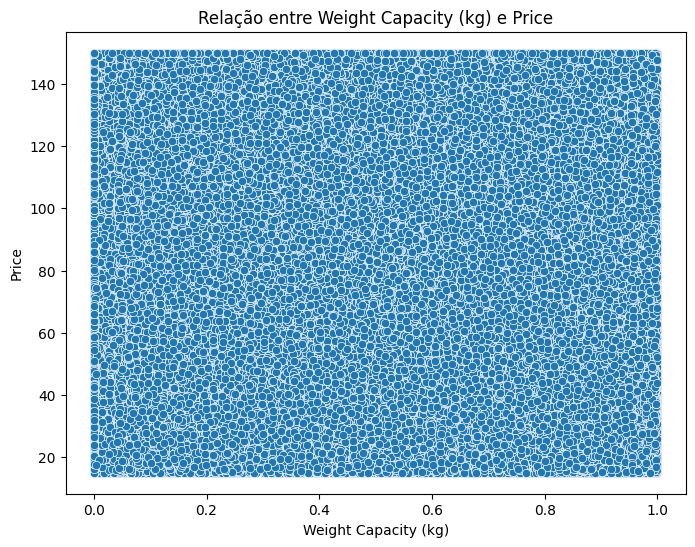

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a correlação de Pearson entre 'Weight Capacity (kg)' e 'Price'
correlacao = df_eng['Weight Capacity (kg)'].corr(df_eng['Price'])
print(f'Coeficiente de correlação de Pearson entre "Weight Capacity (kg)" e "Price": {correlacao}')

# Visualizando a relação com um gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_eng['Weight Capacity (kg)'], y=df_eng['Price'])
plt.title('Relação entre Weight Capacity (kg) e Price')
plt.xlabel('Weight Capacity (kg)')
plt.ylabel('Price')
plt.show()

In [63]:
# Calcular a correlação de Spearman entre 'Weight Capacity (kg)' e 'Price'
correlacao_spearman = df_eng['Weight Capacity (kg)'].corr(df_eng['Price'], method='spearman')
print(f'Coeficiente de correlação de Spearman entre "Weight Capacity (kg)" e "Price": {correlacao_spearman}')


Coeficiente de correlação de Spearman entre "Weight Capacity (kg)" e "Price": 0.017490200969922043


In [64]:
# Calcular a correlação de Kendall entre 'Weight Capacity (kg)' e 'Price'
correlacao_kendall = df_eng['Weight Capacity (kg)'].corr(df_eng['Price'], method='kendall')
print(f'Coeficiente de correlação de Kendall entre "Weight Capacity (kg)" e "Price": {correlacao_kendall}')


Coeficiente de correlação de Kendall entre "Weight Capacity (kg)" e "Price": 0.011632700887663973


In [66]:
# Carregando os datasets para o treinamento e concantenando-os
df_1 = pd.read_csv("../data/train.csv")
df_2 = pd.read_csv("../data/training_extra.csv")
df = pd.concat([df_1, df_2], axis=0)

# Preparando os dados
df_prep = df.copy()

df_prep['Compartments'] = df_prep['Compartments'].astype(int).astype(object)

cat_columns = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
for column in cat_columns:
    # Mostrando a distribuição antes do preenchimento
    category_percent = df_prep[column].value_counts(normalize=True)
        
    # Preenchendo valores NaN com base nas proporções existentes entre as categorias
    n_nan = df_prep[column].isna().sum()
    categories = category_percent.index
    proportions = category_percent.values
    
    new_values = np.random.choice(categories, size=n_nan, p=proportions)

    df_prep.loc[df_prep[column].isna(), column] = new_values

df_prep['Weight Capacity (kg)'] = df_prep['Weight Capacity (kg)'].fillna(df_prep['Weight Capacity (kg)'].mean())

df_prep = df_prep.drop(columns='id')
# Engenharia de atributos: get dummies para TODAS variáveis categóricas
df_eng = df_prep.copy()
cat_columns = df_eng.select_dtypes(include=['object']).columns
for column in cat_columns:
    df_eng = pd.get_dummies(df_eng, columns=[column], prefix=['dum_' + column], dtype=int)

scaler = MinMaxScaler()
df_eng['Weight Capacity (kg)'] = scaler.fit_transform(df_eng[['Weight Capacity (kg)']])

In [67]:
variavias_a_remover = []
# Analisando todas as variáveis binárias com o teste de Mann-Whitney
analisar_variaveis_binarias_com_mann_whitney(df_eng, 'Price')
print(len(df_eng.select_dtypes(include=['int']).columns))
print(len(variavias_a_remover))

  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Adidas.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Jansport.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Nike.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Puma.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Under Armour.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Canvas.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Leather.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Nylon.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Polyester.
  - Existe uma dif

In [ ]:
# Suponha que você tenha uma lista com as variáveis binárias (categóricas após Label Encoding ou One-Hot Encoding)
variaveis_binarias_significativas = df_eng.select_dtypes(include=['int']).columns

# Visualizando a relação entre as variáveis binárias e o 'Price'
visualizar_relacao_com_target(df_eng, 'Price', variaveis_binarias_significativas)

In [69]:
print(variavias_a_remover)

['dum_Size_Small', 'dum_Laptop Compartment_No', 'dum_Laptop Compartment_Yes', 'dum_Waterproof_No', 'dum_Waterproof_Yes', 'dum_Style_Backpack']


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a correlação de Pearson entre 'Weight Capacity (kg)' e 'Price'
correlacao = df_eng['Weight Capacity (kg)'].corr(df_eng['Price'])
print(f'Coeficiente de correlação de Pearson entre "Weight Capacity (kg)" e "Price": {correlacao}')

"""
# Visualizando a relação com um gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_eng['Weight Capacity (kg)'], y=df_eng['Price'])
plt.title('Relação entre Weight Capacity (kg) e Price')
plt.xlabel('Weight Capacity (kg)')
plt.ylabel('Price')
plt.show()
"""

Coeficiente de correlação de Pearson entre "Weight Capacity (kg)" e "Price": 0.0176972782797773


"\n# Visualizando a relação com um gráfico de dispersão\nplt.figure(figsize=(8, 6))\nsns.scatterplot(x=df_eng['Weight Capacity (kg)'], y=df_eng['Price'])\nplt.title('Relação entre Weight Capacity (kg) e Price')\nplt.xlabel('Weight Capacity (kg)')\nplt.ylabel('Price')\nplt.show()\n"

In [71]:
# Calcular a correlação de Spearman entre 'Weight Capacity (kg)' e 'Price'
correlacao_spearman = df_eng['Weight Capacity (kg)'].corr(df_eng['Price'], method='spearman')
print(f'Coeficiente de correlação de Spearman entre "Weight Capacity (kg)" e "Price": {correlacao_spearman}')

# Calcular a correlação de Kendall entre 'Weight Capacity (kg)' e 'Price'
correlacao_kendall = df_eng['Weight Capacity (kg)'].corr(df_eng['Price'], method='kendall')
print(f'Coeficiente de correlação de Kendall entre "Weight Capacity (kg)" e "Price": {correlacao_kendall}')

Coeficiente de correlação de Spearman entre "Weight Capacity (kg)" e "Price": 0.01727701810816101
Coeficiente de correlação de Kendall entre "Weight Capacity (kg)" e "Price": 0.011487695789546845


### REFAZENDO OS TESTES DOS ALGORITMOS, REMOVENDO AS COLUNAS QUE FORAM INDICADAS COMO NÃO TENDO RELEVÂNCIA PARA O TARGET

In [100]:
def data_preparation(df):
    # Pré-processando as variáveis
    df_prep = df.copy()
    df_prep['Compartments'] = df_prep['Compartments'].astype(int).astype(object)

    cat_columns = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
    for column in cat_columns:
        # Mostrando a distribuição antes do preenchimento
        category_percent = df_prep[column].value_counts(normalize=True)
        
        # Preenchendo valores NaN com base nas proporções existentes entre as categorias
        n_nan = df_prep[column].isna().sum()
        categories = category_percent.index
        proportions = category_percent.values

        new_values = np.random.choice(categories, size=n_nan, p=proportions)

        df_prep.loc[df_prep[column].isna(), column] = new_values

    df_prep['Weight Capacity (kg)'] = df_prep['Weight Capacity (kg)'].fillna(df_prep['Weight Capacity (kg)'].mean())

    # Engenharia de atributos: get dummies para TODAS variáveis categóricas
    df_eng = df_prep.copy()
    cat_columns = df_eng.select_dtypes(include=['object']).columns
    for column in cat_columns:
        df_eng = pd.get_dummies(df_eng, columns=[column], prefix=['dum_' + column], dtype=int)

    scaler = MinMaxScaler()
    df_eng['Weight Capacity (kg)'] = scaler.fit_transform(df_eng[['Weight Capacity (kg)']])

    return df_eng

In [ ]:
# Carregando os datasets para o treinamento e concantenando-os
df_1 = pd.read_csv("../data/train.csv")
df_2 = pd.read_csv("../data/training_extra.csv")
df = pd.concat([df_1, df_2], axis=0)

# Preparando os dados de treino
df_prep = data_preparation(df)

variaveis_a_remover = ['dum_Size_Small', 'dum_Laptop Compartment_No', 'dum_Laptop Compartment_Yes', 'dum_Waterproof_No', 'dum_Waterproof_Yes', 'dum_Style_Backpack', 'id', 'Weight Capacity (kg)']

df_prep = df_prep.drop(columns=variaveis_a_remover)

# Separando em base de treino e de teste
X = df_prep.drop(columns=['Price'])
y = df_prep['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Treinando o modelo
ridge = Ridge()
ridge.fit(X_train, y_train)

# Predizendo o target
y_pred = ridge.predict(X_test)

# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{rmse:.5f}")

38.89971


### USANDO O DATA PREPATAION 2

In [111]:
def data_preparation(df):
    # Pré-processando as variáveis
    df_prep = df.copy()
    df_prep['Compartments'] = df_prep['Compartments'].astype(int).astype(object)

    cat_columns = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
    for column in cat_columns:
        # Mostrando a distribuição antes do preenchimento
        category_percent = df_prep[column].value_counts(normalize=True)
        
        # Preenchendo valores NaN com base nas proporções existentes entre as categorias
        n_nan = df_prep[column].isna().sum()
        categories = category_percent.index
        proportions = category_percent.values

        new_values = np.random.choice(categories, size=n_nan, p=proportions)

        df_prep.loc[df_prep[column].isna(), column] = new_values

    df_prep['Weight Capacity (kg)'] = df_prep['Weight Capacity (kg)'].fillna(df_prep['Weight Capacity (kg)'].mean())

    # Engenharia de atributos: get dummies para TODAS variáveis categóricas
    df_eng = df_prep.copy()

    # Engenharia de Atributos: transformando 'Size' em numérica ordinal
    size_mapping = {
        'Small': 1,
        'Medium': 2,
        'Large': 3
    }
    df_eng['Size'] = df_eng['Size'].replace(size_mapping)
    
    # Engenharia de Atributos: convertendo 'Yes' e 'No' em 1 e 0 nas variáveis 'Laptop Compartment' e 'Waterproof'
    df_eng['Laptop Compartment'] = df_eng['Laptop Compartment'].replace({'Yes': 1, 'No': 0})
    df_eng['Waterproof'] = df_eng['Waterproof'].replace({'Yes': 1, 'No': 0})

    cat_columns = df_eng.select_dtypes(include=['object']).columns
    for column in cat_columns:
        df_eng = pd.get_dummies(df_eng, columns=[column], prefix=['dum_' + column], dtype=int)

    scaler = MinMaxScaler()
    df_eng['Weight Capacity (kg)'] = scaler.fit_transform(df_eng[['Weight Capacity (kg)']])

    return df_eng

In [131]:
# Carregando os datasets para o treinamento e concantenando-os
df_1 = pd.read_csv("../data/train.csv")
df_2 = pd.read_csv("../data/training_extra.csv")
df = pd.concat([df_1, df_2], axis=0)

# Preparando os dados de treino
df_prep = data_preparation(df)

In [132]:
from scipy import stats

# Teste de Kruskal-Wallis para comparar 'Price' entre as diferentes categorias de 'Size' no dataset 'df_prep'
kruskal_resultado = stats.kruskal(
    df_prep['Price'][df_prep['Size'] == 1],
    df_prep['Price'][df_prep['Size'] == 2],
    df_prep['Price'][df_prep['Size'] == 3]
)

# Exibir o resultado do teste
print(f"Resultado Kruskal-Wallis: H-statistic = {kruskal_resultado.statistic}, p-valor = {kruskal_resultado.pvalue}")

# Interpretando o p-valor
if kruskal_resultado.pvalue < 0.05:
    print("Há uma diferença significativa nas medianas de 'Price' entre as categorias de 'Size'.")
else:
    print("Não há diferença significativa nas medianas de 'Price' entre as categorias de 'Size'.")


Resultado Kruskal-Wallis: H-statistic = 68.33957331945092, p-valor = 1.4462727578765715e-15
Há uma diferença significativa nas medianas de 'Price' entre as categorias de 'Size'.


In [137]:
variaveis_a_remover = []
# Analisando todas as variáveis binárias com o teste de Mann-Whitney
analisar_variaveis_binarias_com_mann_whitney(df_prep, 'Price')
print(len(variaveis_a_remover))

  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Adidas.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Jansport.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Nike.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Puma.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Under Armour.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Canvas.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Leather.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Nylon.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Polyester.
  - Existe uma dif

In [139]:
# Calcular a correlação de Pearson entre 'Weight Capacity (kg)' e 'Price'
correlacao = df_prep['Weight Capacity (kg)'].corr(df_prep['Price'])
print(f'Coeficiente de correlação de Pearson entre "Weight Capacity (kg)" e "Price": {correlacao}')

# Calcular a correlação de Spearman entre 'Weight Capacity (kg)' e 'Price'
correlacao_spearman = df_prep['Weight Capacity (kg)'].corr(df_prep['Price'], method='spearman')
print(f'Coeficiente de correlação de Spearman entre "Weight Capacity (kg)" e "Price": {correlacao_spearman}')

# Calcular a correlação de Kendall entre 'Weight Capacity (kg)' e 'Price'
correlacao_kendall = df_prep['Weight Capacity (kg)'].corr(df_prep['Price'], method='kendall')
print(f'Coeficiente de correlação de Kendall entre "Weight Capacity (kg)" e "Price": {correlacao_kendall}')

Coeficiente de correlação de Pearson entre "Weight Capacity (kg)" e "Price": 0.0176972782797773
Coeficiente de correlação de Spearman entre "Weight Capacity (kg)" e "Price": 0.01727701810816101
Coeficiente de correlação de Kendall entre "Weight Capacity (kg)" e "Price": 0.011487695789546845


In [149]:
# Carregando os datasets para o treinamento e concantenando-os
df_1 = pd.read_csv("../data/train.csv")
df_2 = pd.read_csv("../data/training_extra.csv")
df = pd.concat([df_1, df_2], axis=0)

# Preparando os dados de treino
df_prep = data_preparation(df)

variaveis_a_remover = ['dum_Style_Backpack', 'id', 'Weight Capacity (kg)']

df_prep = df_prep.drop(columns=variaveis_a_remover)

# Separando em base de treino e de teste
X = df_prep.drop(columns=['Price'])
y = df_prep['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
ridge = Ridge()
ridge.fit(X_train, y_train)

# Predizendo o target
y_pred = ridge.predict(X_test)

# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{rmse:.5f}")

38.90048


### RECOMEÇAR TODO O PROCESSO PARA VER SE ENCONTRO RESULTADOS MELHORES

#### VAMOS ALTERAR A FORMA DE PREENCHER OS VALORES NAN

In [191]:
# Carregando os datasets para o treinamento e concantenando-os
df_1 = pd.read_csv("../data/train.csv")
df_2 = pd.read_csv("../data/training_extra.csv")
df = pd.concat([df_1, df_2], axis=0)

df_prep = df.copy()
df_prep['Compartments'] = df_prep['Compartments'].astype(int).astype(object)


# Preenchendo valores NaN das variáveis categóricas com a moda
cat_columns = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
for column in cat_columns:
    df_prep[column].fillna(df_prep[column].mode()[0], inplace=True)

# Preenchendo valores NaN das variáveis numéricas (Weight Capacity(kg))
df_prep['Weight Capacity (kg)'] = df_prep['Weight Capacity (kg)'].fillna(df_prep['Weight Capacity (kg)'].mean())

# Engenharia de atributos: get dummies para TODAS variáveis categóricas
df_eng = df_prep.copy()

# Engenharia de Atributos: transformando 'Size' em numérica ordinal
size_mapping = {
    'Small': 1,
    'Medium': 2,
    'Large': 3
}
df_eng['Size'] = df_eng['Size'].replace(size_mapping)
    
# Engenharia de Atributos: convertendo 'Yes' e 'No' em 1 e 0 nas variáveis 'Laptop Compartment' e 'Waterproof'
df_eng['Laptop Compartment'] = df_eng['Laptop Compartment'].replace({'Yes': 1, 'No': 0})
df_eng['Waterproof'] = df_eng['Waterproof'].replace({'Yes': 1, 'No': 0})

# Convertendo 'Laptop Compartment' e 'Waterproof' para int32
df_eng['Laptop Compartment'] = df_eng['Laptop Compartment'].astype('int32')
df_eng['Waterproof'] = df_eng['Waterproof'].astype('int32')


cat_columns = ['Brand', 'Material', 'Style', 'Color']
for column in cat_columns:
    df_eng = pd.get_dummies(df_eng, columns=[column], prefix=['dum_' + column], dtype=int)

scaler = MinMaxScaler()
df_eng['Weight Capacity (kg)'] = scaler.fit_transform(df_eng[['Weight Capacity (kg)']])


In [192]:
# Removendo colunas indesejadas
variaveis_a_remover = ['id', 'Laptop Compartment', 'dum_Brand_Nike', 'dum_Style_Backpack']
df_eng = df_eng.drop(columns=variaveis_a_remover)

# Separando em base de treino e de teste
X = df_eng.drop(columns=['Price'])
y = df_eng['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
ridge = Ridge()
ridge.fit(X_train, y_train)

# Predizendo o target
y_pred = ridge.predict(X_test)

# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{rmse:.5f}")

38.89709


In [172]:
# Calcular a correlação de Pearson entre 'Weight Capacity (kg)' e 'Price'
correlacao = df_eng['Weight Capacity (kg)'].corr(df_eng['Price'])
print(f'Coeficiente de correlação de Pearson entre "Weight Capacity (kg)" e "Price": {correlacao}')

# Calcular a correlação de Spearman entre 'Weight Capacity (kg)' e 'Price'
correlacao_spearman = df_eng['Weight Capacity (kg)'].corr(df_eng['Price'], method='spearman')
print(f'Coeficiente de correlação de Spearman entre "Weight Capacity (kg)" e "Price": {correlacao_spearman}')

# Calcular a correlação de Kendall entre 'Weight Capacity (kg)' e 'Price'
correlacao_kendall = df_eng['Weight Capacity (kg)'].corr(df_eng['Price'], method='kendall')
print(f'Coeficiente de correlação de Kendall entre "Weight Capacity (kg)" e "Price": {correlacao_kendall}')

Coeficiente de correlação de Pearson entre "Weight Capacity (kg)" e "Price": 0.0176972782797773
Coeficiente de correlação de Spearman entre "Weight Capacity (kg)" e "Price": 0.01727701810816101
Coeficiente de correlação de Kendall entre "Weight Capacity (kg)" e "Price": 0.011487695789546845


In [184]:
variaveis_a_remover = []
# Analisando todas as variáveis binárias com o teste de Mann-Whitney
analisar_variaveis_binarias_com_mann_whitney(df_eng, 'Price')
print(variaveis_a_remover)

  - Existe uma diferença significativa nas distribuições de Price entre as categorias de Waterproof.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Adidas.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Jansport.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Puma.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Brand_Under Armour.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Canvas.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Leather.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Nylon.
  - Existe uma diferença significativa nas distribuições de Price entre as categorias de dum_Material_Polyester.
  - Existe uma diferen

In [185]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3694317
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Size                    int64  
 1   Compartments            object 
 2   Laptop Compartment      int32  
 3   Waterproof              int32  
 4   Weight Capacity (kg)    float64
 5   Price                   float64
 6   dum_Brand_Adidas        int32  
 7   dum_Brand_Jansport      int32  
 8   dum_Brand_Nike          int32  
 9   dum_Brand_Puma          int32  
 10  dum_Brand_Under Armour  int32  
 11  dum_Material_Canvas     int32  
 12  dum_Material_Leather    int32  
 13  dum_Material_Nylon      int32  
 14  dum_Material_Polyester  int32  
 15  dum_Style_Backpack      int32  
 16  dum_Style_Messenger     int32  
 17  dum_Style_Tote          int32  
 18  dum_Color_Black         int32  
 19  dum_Color_Blue          int32  
 20  dum_Color_Gray          int32  
 21  dum_Color_Green         int32  
 22 

In [187]:
df_eng['Compartments'].unique()

array([7, 10, 2, 8, 1, 3, 5, 9, 6, 4], dtype=object)

In [189]:
# Teste de Kruskal-Wallis para comparar 'Price' entre as diferentes categorias de 'Size' no dataset 'df_prep'
kruskal_resultado = stats.kruskal(
    df_eng['Price'][df_eng['Compartments'] == 1],
    df_eng['Price'][df_eng['Compartments'] == 2],
    df_eng['Price'][df_eng['Compartments'] == 3],
    df_eng['Price'][df_eng['Compartments'] == 4],
    df_eng['Price'][df_eng['Compartments'] == 5],
    df_eng['Price'][df_eng['Compartments'] == 6],
    df_eng['Price'][df_eng['Compartments'] == 7],
    df_eng['Price'][df_eng['Compartments'] == 8],
    df_eng['Price'][df_eng['Compartments'] == 9],
    df_eng['Price'][df_eng['Compartments'] == 10]
)

# Exibir o resultado do teste
print(f"Resultado Kruskal-Wallis: H-statistic = {kruskal_resultado.statistic}, p-valor = {kruskal_resultado.pvalue}")

# Interpretando o p-valor
if kruskal_resultado.pvalue < 0.05:
    print("Há uma diferença significativa nas medianas de 'Price' entre as categorias de 'Compartments'.")
else:
    print("Não há diferença significativa nas medianas de 'Price' entre as categorias de 'Compartments'.")

Resultado Kruskal-Wallis: H-statistic = 462.5468807657852, p-valor = 5.951282701748274e-94
Há uma diferença significativa nas medianas de 'Price' entre as categorias de 'Compartments'.
